In [14]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import umap

Hamiltonian ODE

$\dot{x} = x \otimes Wx$ 

where $\otimes$ is a tensor product is also known as the replicator equation and provides an important model in ecology and economics. It displays a diversity of dynamics. It is sometimes completely integrable: that is you can find half (or half+1, if it is in odd dimensions) conserved quantities. 

If W is circulant skew-symmetric, this is $\pm 1$ matrix, then it is completely integrable by Veselov-Shabbat. It is a discrete KDV equation. In this situation, the dynamics preserve volume because the divergence is zero. 

An example of such W is 

$A = \begin{bmatrix} 0 &+1 &-1 &+1 &-1 \\
                -1 & 0 & +1& -1 & +1 \\
                +1 & -1 & 0 & +1 & -1 \\
                -1 & +1 & -1 & 0 & +1 \\
                +1 & -1 & +1 & -1 & 0 
\end{bmatrix}$

An example of another W is 

$B = \begin{bmatrix} 
& & & -1 & +1 \\
&A& & \vdots & \vdots\\
& & & -1& +1\\
+1 &...&+1 & 0 & -1\\
-1 &...&-1 & +1& 0
\end{bmatrix}$

You can construct conserved quantities combinatorially. You can nest them, and thus build more:

$C = \begin{bmatrix} 
& & & -1 & +1 \\
&B& & \vdots & \vdots\\
& & & -1& +1\\
+1 &...&+1 & 0 & -1\\
-1 &...&-1 & +1& 0
\end{bmatrix}$

etc. The divergences of $B$ and $C$ are not zero. 

## Veselov-Shabat KdV

In the case below we have a uniform point distribution on the manifold: divergence 0, the dynamics preserves volume.

In [15]:
def Veselov_Shabbat_KDV(x, t):
    x1, x2, x3, x4, x5 = x
    dxdt = [5*x1*(-x2-x3+x4+x5),
            5*x2*(-x3-x4+x5+x1),
            5*x3*(-x4-x5+x1+x2),
            5*x4*(-x5-x1+x2+x3),
            5*x5*(-x1-x2+x3+x4)]
    return dxdt

In [33]:
x0 = [0.25,0.15,0.1,0.2,0.3]
t = np.arange(0.0, 1e2, 1e-1)
sol_KDV = odeint(Veselov_Shabbat_KDV, x0, t)

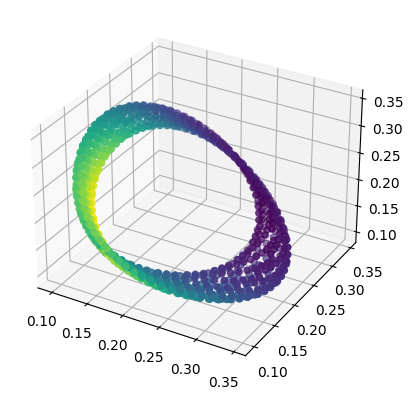

In [34]:
col_min = min(sol_KDV[:, 3])
col_max = max(sol_KDV[:, 3])
normalized_colors = (sol_KDV[:, 3] - col_min) / (col_max - col_min)
ax = plt.figure().add_subplot(projection='3d');
ax.scatter(sol_KDV[:,0], sol_KDV[:,1], sol_KDV[:,2], c=normalized_colors, cmap='viridis');

In [39]:
n_neighbors = int(np.log(sol_KDV.shape[0]))
min_dist = np.sqrt(sol_KDV.shape[1])*1e-1
fit = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=3, metric='euclidean', verbose=True)
fit

UMAP(min_dist=0.223606797749979, n_components=3, n_neighbors=6, verbose=True)

In [40]:
embedding_KDV = fit.fit_transform(sol_KDV)

UMAP(min_dist=0.223606797749979, n_components=3, n_neighbors=6, verbose=True)
Sat Sep  9 11:23:07 2023 Construct fuzzy simplicial set
Sat Sep  9 11:23:07 2023 Finding Nearest Neighbors
Sat Sep  9 11:23:07 2023 Finished Nearest Neighbor Search
Sat Sep  9 11:23:07 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sat Sep  9 11:23:08 2023 Finished embedding


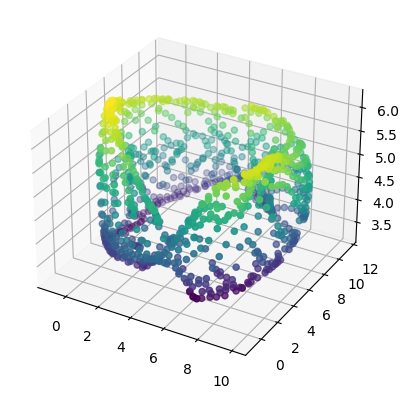

In [41]:
col_min = min(embedding_KDV[:,2])
col_max = max(embedding_KDV[:,2])
normalized_colors = (embedding_KDV[:,2] - col_min) / (col_max - col_min)
ax = plt.figure().add_subplot(projection='3d');
ax.scatter(embedding_KDV[:,0], embedding_KDV[:,1], embedding_KDV[:,2], c=normalized_colors, cmap='viridis');

## A Paik-Griffin replicatior

The point distribution on the manifold is not unifors, and the UMAP embedding  drops one dimension down. 

In [42]:
def Paik_Griffin(x, t):
    x1, x2, x3, x4, x5 = x
    dxdt = [5*x1*(-x2+x3-x4+x5),
            5*x2*(-x3-x4+x5+x1),
            5*x3*(-x4+x5-x1+x2),
            5*x4*(-x5+x1+x2+x3),
            5*x5*(-x1-x2-x3+x4)]
    return dxdt

In [43]:
x0 = [0.25,0.15,0.1,0.5,0.3]
t = np.arange(0.0, 1e2, 1e-1)
sol_PG = odeint(Paik_Griffin, x0, t)

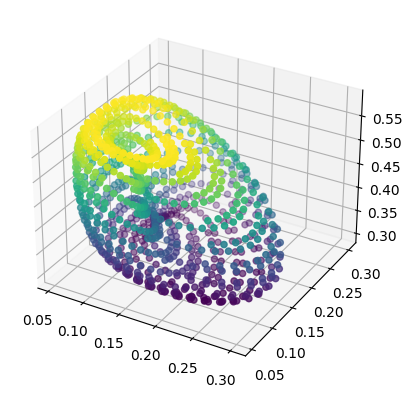

In [44]:
col_min = min(sol_PG[:, 3])
col_max = max(sol_PG[:, 3])
normalized_colors = (sol_PG[:, 3] - col_min) / (col_max - col_min)
ax = plt.figure().add_subplot(projection='3d');
ax.scatter(sol_PG[:,1], sol_PG[:,2], sol_PG[:,3], c=normalized_colors, cmap='viridis');

In [45]:
n_neighbors = int(np.log(sol_PG.shape[0]))
min_dist = np.sqrt(sol_PG.shape[1])*1e-1
fit = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=3, metric='euclidean', verbose=True)
fit

UMAP(min_dist=0.223606797749979, n_components=3, n_neighbors=6, verbose=True)

In [46]:
embedding_PG = fit.fit_transform(sol_PG)

UMAP(min_dist=0.223606797749979, n_components=3, n_neighbors=6, verbose=True)
Sat Sep  9 11:23:28 2023 Construct fuzzy simplicial set
Sat Sep  9 11:23:28 2023 Finding Nearest Neighbors
Sat Sep  9 11:23:28 2023 Finished Nearest Neighbor Search
Sat Sep  9 11:23:28 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sat Sep  9 11:23:29 2023 Finished embedding


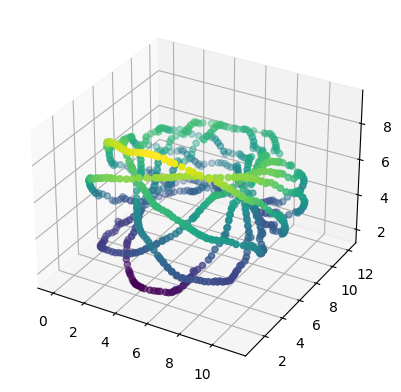

In [47]:
col_min = min(embedding_PG[:,2])
col_max = max(embedding_PG[:,2])
normalized_colors = (embedding_PG[:,2] - col_min) / (col_max - col_min)
ax = plt.figure().add_subplot(projection='3d');
ax.scatter(embedding_PG[:,0], embedding_PG[:,1], embedding_PG[:,2], c=normalized_colors, cmap='viridis');